# Fundamental Diagram and CTM example

**Task**
Consider a stretch of road.
The link is split into cells of length $\Delta x$, and assume that the same
fundamental diagram holds for each of these.
Assuming that the fundamental diagram can be represented as a *triangular* shape in the flow-density plane, the corresponding fundamentl diagram is the speed-flow can be seen below.

**My own subtask**
They give me a weird plot of the flow-speed diagram.
I would like to reproduce this from a triangular fundamental diagram.

I notice from the plot that at speed 50 km/h, the flow is 1200 veh/h.
I also notice that at speed 0 km/h, the flow is 0 veh/h.

Thus the diagram has the following form
$$
q_{triangular} = \begin{cases}
v_o k & k<k_c \\
q_c - \dfrac{k-k_c}{k_j-k_c}q_c & k\geq k_c
\end{cases}
$$

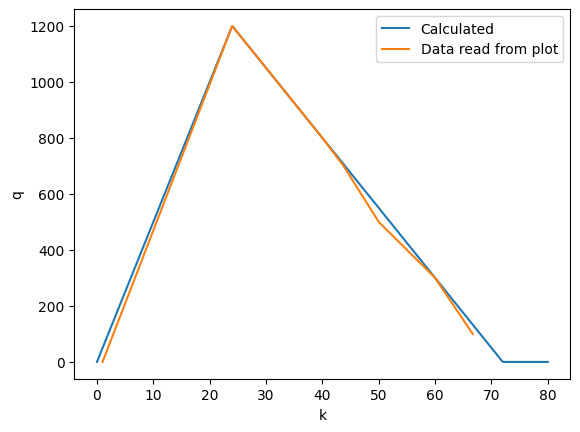

In [73]:
import numpy as np

# Try to determine trianfular function myself
def q_tri(k):
    q_c = 1200
    u_0 = 50
    u_c = u_0
    k_c = q_c / u_c
    # Utilize that there is a straight line between
    # (k_c, q_c) and (800, 20) and we just need to find
    # the slope of that line and the intersection with the
    # x-axis
    u1 = 20
    q1 = 800
    k1 = q1 / u1
    slope = (q1 - q_c) / (k1 - k_c)
    k_jam = k_c-q_c / slope 
    
    if k <= k_c:
        return u_0 * k
    elif k <= k_jam:
        return q_c - q_c * (k-k_c) / (k_jam - k_c)
    else:
        return 0
    
       

# Read points from plot
# (q, u)
points = [
    (0.1, 0.1),
    (100, 1.5),
    (300, 5),
    (500, 10),
    (700, 16),
    (800, 20),
    (1200,50)
]

# Use that k = q/u
# to find ks
ks = [q/u for q, u in points]
qs = [q for q, u in points]

ks_calc = np.linspace(0,80,500)
# Calculate qs from k
qs_calc = [q_tri(k) for k in ks_calc]



# Sort by k
ks, qs = zip(*sorted(zip(ks, qs)))

# Plot k, q
import matplotlib.pyplot as plt
plt.plot(ks_calc, qs_calc, label='Calculated')
plt.plot(ks, qs, label='Data read from plot')
plt.legend()
plt.xlabel('k')
plt.ylabel('q')
plt.show()



/tmp/ipykernel_24426/575559552.py:5: RuntimeWarning: invalid value encountered in scalar divide
  vs_calc = [q_tri(k) / k for k in ks_calc]


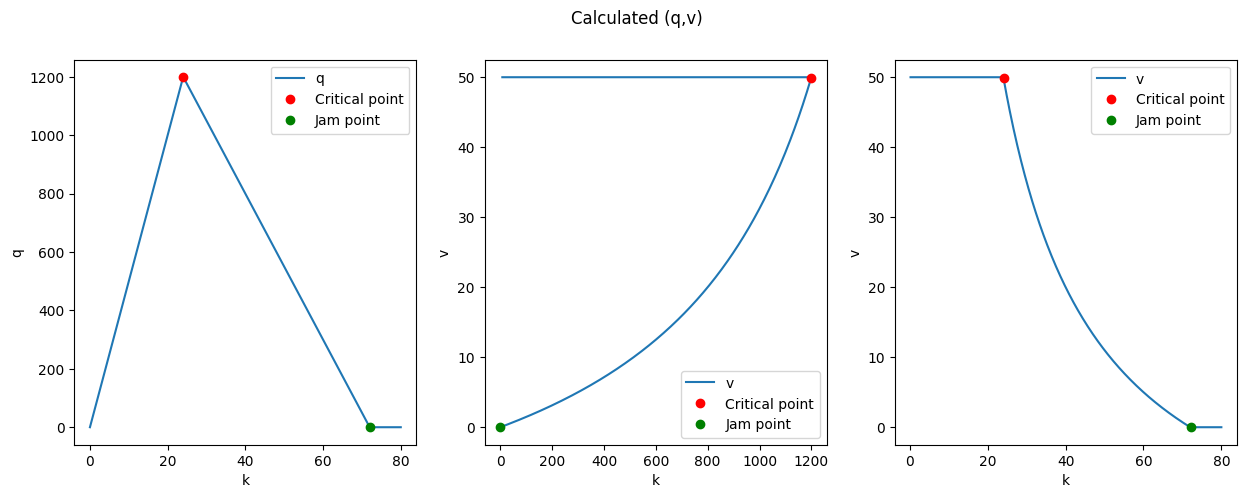

In [98]:
# Plot calculated (q,v) 
ks_calc = np.linspace(0,80,500)
# Calculate qs from k
qs_calc = [q_tri(k) for k in ks_calc]
vs_calc = [q_tri(k) / k for k in ks_calc]

# Plot three graphs as subplots
fig, axs = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Calculated (q,v)')
axs[0].plot(ks_calc, qs_calc, label='q')
axs[0].set_xlabel('k')
axs[0].set_ylabel('q')


# Plot critical point, by finding highest q
q_max = max(qs_calc)
k_max = ks_calc[qs_calc.index(q_max)]
v_max = q_max / k_max
# Calculate the k_jam from where the q is 0 first time after the critical point
k_jam = None
passed_critical = False
for k, q in zip(ks_calc, qs_calc):
    if passed_critical and q == 0:
        k_jam = k
        break
    if q == q_max:
        passed_critical = True

q_jam = 0
v_jam = q_jam / k_jam

axs[0].plot(k_max, q_max, 'ro', label='Critical point')
axs[0].plot(k_jam, q_jam, 'go', label='Jam point')
axs[0].legend()


axs[1].plot(qs_calc, vs_calc, label='v')
axs[1].set_xlabel('k')
axs[1].set_ylabel('v')
# Plot critical point
axs[1].plot(q_max, v_max, 'ro', label='Critical point')
axs[1].plot(q_jam, v_jam, 'go', label='Jam point')
axs[1].legend()

axs[2].plot(ks_calc, vs_calc, label='v')
axs[2].set_xlabel('k')
axs[2].set_ylabel('v')
# Plot critical point
axs[2].plot(k_max, v_max, 'ro', label='Critical point')
axs[2].plot(k_jam, v_jam, 'go', label='Jam point')
axs[2].legend()
# Plot critical point
plt.show()


In [99]:
k1, k2, k3, k4, k5 = 5, 15, 48, 15, 60
capacity = 1200
k_c = 1200 / 50

def D(k):
    if k <= k_c:
        return q_tri(k)
    else:
        return capacity

def S(k):
    if k <= k_c:
        return capacity
    else:
        return q_tri(k)

def q_trans(k_from, k_to):
    return min(D(k_from), S(k_to))

q_trans(k2, k3), q_trans(k3, k4)
    

(600.0, 1200)